## **T-Test**

**Experiment #1:** 500 samples
`Test A` is our control group (in red), `Test B` (in green) has a mean value 10% greater than that of the control group, and just for fun `Test C` (in blue) has a mean 400% greater than that of the control group.

In [6]:
import numpy as np

# Initialize the random number generator
rng = np.random.default_rng()
n_samples = 500

# Test A (control)
mu_of_A    = 1
sigma_of_A = 1
test_A     = mu_of_A + sigma_of_A * rng.standard_normal(n_samples)

# Test B
mu_of_B    = 1.1
sigma_of_B = 1
test_B     = mu_of_B + sigma_of_B * rng.standard_normal(n_samples)

# Test C
mu_of_C    = 4
sigma_of_C = 1
test_C     = mu_of_C + sigma_of_C * rng.standard_normal(n_samples)

/space/hotel/hienng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/space/hotel/hienng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/space/hotel/hienng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/space/hotel/hienng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

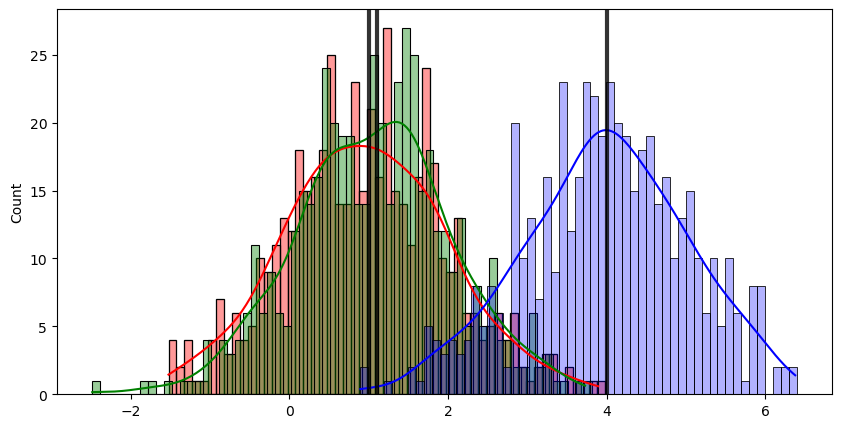

Mean value of test A data = 0.96
Mean value of test B data = 1.06
Mean value of test C data = 3.98


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=test_A,  binwidth=0.1, kde=True, alpha =0.4, color="red")
sns.histplot(data=test_B,  binwidth=0.1, kde=True, alpha =0.4, color="green")
sns.histplot(data=test_C,  binwidth=0.1, kde=True, alpha =0.3, color="blue")
ax.axvline(x=1, linestyle='-', alpha=0.8, c='black', lw=3)
ax.axvline(x=1.1, linestyle='-', alpha=0.8, c='black', lw=3)
ax.axvline(x=4, linestyle='-', alpha=0.8, c='black', lw=3)
plt.show();
print("Mean value of test A data = %.2f" %np.mean(test_A))
print("Mean value of test B data = %.2f" %np.mean(test_B))
print("Mean value of test C data = %.2f" %np.mean(test_C))

**Note**: The vertical lines represent the ground truth mean values

## **Perform a two-sample t-test**

In [8]:
from statsmodels.stats.weightstats import ttest_ind

t_test, p_value, deg_freedom = ttest_ind(test_A, test_B, alternative="two-sided", usevar="unequal")
print("p-value of %.3f" % p_value,"for the hypothesis that μ_A = μ_B")
t_test, p_value, deg_freedom = ttest_ind(test_A, test_C, alternative="two-sided", usevar="unequal")
print("p-value of %.3f" % p_value,"for the hypothesis that μ_A = μ_C")

p-value of 0.103 for the hypothesis that μ_A = μ_B
p-value of 0.000 for the hypothesis that μ_A = μ_C


- The `p-value` for A/B indicates that if `μA=μB` then there is a 12.2% chance of observing the values we have seen here. In other words, there is a 12.2% chance that the data in green could just as well have been generated by our control group. The `pvalue` at 0.028 may not help us to reject the null hypothesis

- On the other hand, for the A/C test, given `μA=μC` the `p-value` indicates there is no chance of observing the distribution for `Test C` that we have seen here; the data we see for `Test C` are incompatible with the hypothesis that `μC=μA`.

**Experiment #2:** 5000 samples

/space/hotel/hienng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/space/hotel/hienng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/space/hotel/hienng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/space/hotel/hienng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

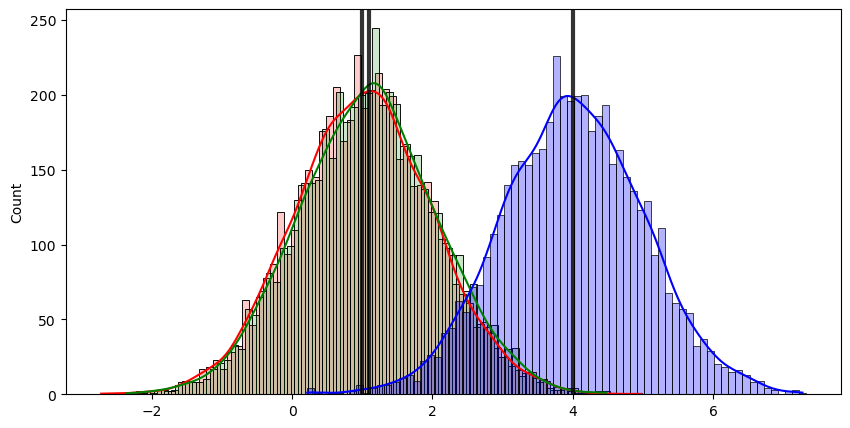

Mean value of test A data = 1.02
Mean value of test B data = 1.08
Mean value of test C data = 4.00
p-value of 0.001 for the hypothesis that μ_A = μ_B
p-value of 0.000 for the hypothesis that μ_A = μ_C


In [9]:
n_samples = 5000
# control
mu_of_A    = 1
sigma_of_A = 1
test_A     = mu_of_A + sigma_of_A * rng.standard_normal(n_samples)
# test B
mu_of_B    = 1.1
sigma_of_B = 1
test_B = mu_of_B + sigma_of_B * rng.standard_normal(n_samples)
# test C
mu_of_C    = 4
sigma_of_C = 1
test_C = mu_of_C + sigma_of_C * rng.standard_normal(n_samples)

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=test_A,  binwidth=0.1, kde=True, alpha =0.2, color="red")
sns.histplot(data=test_B,  binwidth=0.1, kde=True, alpha =0.2, color="green")
sns.histplot(data=test_C,  binwidth=0.1, kde=True, alpha =0.3, color="blue")
ax.axvline(x=1, linestyle='-', alpha=0.8, c='black', lw=3)
ax.axvline(x=1.1, linestyle='-', alpha=0.8, c='black', lw=3)
ax.axvline(x=4, linestyle='-', alpha=0.8, c='black', lw=3)
plt.show();
print("Mean value of test A data = %.2f" %np.mean(test_A))
print("Mean value of test B data = %.2f" %np.mean(test_B))
print("Mean value of test C data = %.2f" %np.mean(test_C))
t_test, p_value, deg_freedom = ttest_ind(test_A, test_B, alternative="two-sided", usevar="unequal")
print("p-value of %.3f" % p_value,"for the hypothesis that μ_A = μ_B")
t_test, p_value, deg_freedom = ttest_ind(test_A, test_C, alternative="two-sided", usevar="unequal")
print("p-value of %.3f" % p_value,"for the hypothesis that μ_A = μ_C")

- This time we can see that the p-value indicates only a `0.3% chance` that the data seen for `Test B` could have been the result of a model where `μB=μA`. This would lend weight to the alternative hypothesis that the two mean values are indeed different.

- It is worth reiterating that both in the first and the second experiment the raw data for `Test A` and `Test B` were both drawn from the very same underlying distribution. In the first experiment we had a plausible hypothesis that both distributions had the same mean value, whereas in the second experiment it was plausible that the distributions had different means; this is all down to the quality of the data, i.e. the different number of samples in each simulation.

## **POWER ANALYSIS**

We can see that in the second experiment, even though the mean values of `Test A` (1.02) and `Test B` (1.08) were actually closer together than they were in the first experiment, (Test A = 1.00, Test B = 1.07) it can be seen that this difference is much more statistically significant. This is due to the greater number of samples in the second experiment. In other words, the second experiment was much more 'powerful' than the first experiment, the first experiment was 'under-powered'.

**For example:** A/C test with 80% power

/space/hotel/hienng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/space/hotel/hienng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/space/hotel/hienng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/space/hotel/hienng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

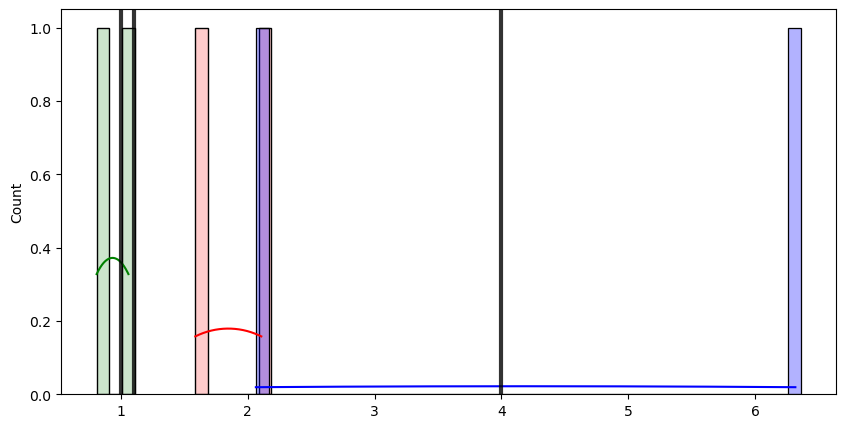

Mean value of test A data = 1.85
Mean value of test B data = 0.93
Mean value of test C data = 4.19
p-value of 0.130 for the hypothesis that μ_A = μ_B
p-value of 0.467 for the hypothesis that μ_A = μ_C


In [10]:
n_samples = 2

# control
mu_of_A    = 1
sigma_of_A = 1
test_A     = mu_of_A + sigma_of_A * rng.standard_normal(n_samples)
# test B
mu_of_B    = 1.1
sigma_of_B = 1
test_B = mu_of_B + sigma_of_B * rng.standard_normal(n_samples)
# test C
mu_of_C    = 4
sigma_of_C = 1
test_C = mu_of_C + sigma_of_C * rng.standard_normal(n_samples)

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=test_A,  binwidth=0.1, kde=True, alpha =0.2, color="red")
sns.histplot(data=test_B,  binwidth=0.1, kde=True, alpha =0.2, color="green")
sns.histplot(data=test_C,  binwidth=0.1, kde=True, alpha =0.3, color="blue")
kde_kws={"color": "k", "lw": 1, "label": "KDE",'linestyle':'--'}
ax.axvline(x=1, linestyle='-', alpha=0.8, c='black', lw=3)
ax.axvline(x=1.1, linestyle='-', alpha=0.8, c='black', lw=3)
ax.axvline(x=4, linestyle='-', alpha=0.8, c='black', lw=3)
plt.show();
print("Mean value of test A data = %.2f" %np.mean(test_A))
print("Mean value of test B data = %.2f" %np.mean(test_B))
print("Mean value of test C data = %.2f" %np.mean(test_C))
t_test, p_value, deg_freedom = ttest_ind(test_A, test_B, alternative="two-sided", usevar="unequal")
print("p-value of %.3f" % p_value,"for the hypothesis that μ_A = μ_B")
t_test, p_value, deg_freedom = ttest_ind(test_A, test_C, alternative="two-sided", usevar="unequal")
print("p-value of %.3f" % p_value,"for the hypothesis that μ_A = μ_C")